<a href="https://colab.research.google.com/github/shariq101/NLP-Shakespearean_word_Gen/blob/main/Sentiment_Analysis_Using_various_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from google.colab import files
uploaded = files.upload()

Saving RESULT.csv to RESULT.csv


In [4]:
train = pd.read_csv('/content/train.tsv',sep = '\t')
test = pd.read_csv('/content/test.tsv',sep = '\t')

In [6]:
train.head(100)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
95,96,3,", I suspect ,",2
96,97,3,"I suspect ,",2
97,98,3,I suspect,2
98,99,3,I,2


In [7]:
test.head(100)

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
95,156156,8547,Once
96,156157,8547,you get into its rhythm
97,156158,8547,you
98,156159,8547,get into its rhythm


In [8]:
class_count = train['Sentiment'].value_counts()
class_count

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of reviews ')

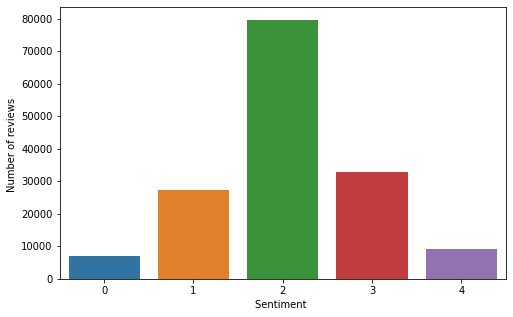

In [9]:
x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

In [10]:
print('Number of sentences in training set:',len(train['SentenceId'].unique()))
print('Number of sentences in test set:',len(test['SentenceId'].unique()))
print('Average words per sentence in train:',train.groupby('SentenceId')['Phrase'].count().mean())
print('Average words per sentence in test:',test.groupby('SentenceId')['Phrase'].count().mean())

Number of sentences in training set: 8529
Number of sentences in test set: 3310
Average words per sentence in train: 18.297572986282095
Average words per sentence in test: 20.027794561933536


In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

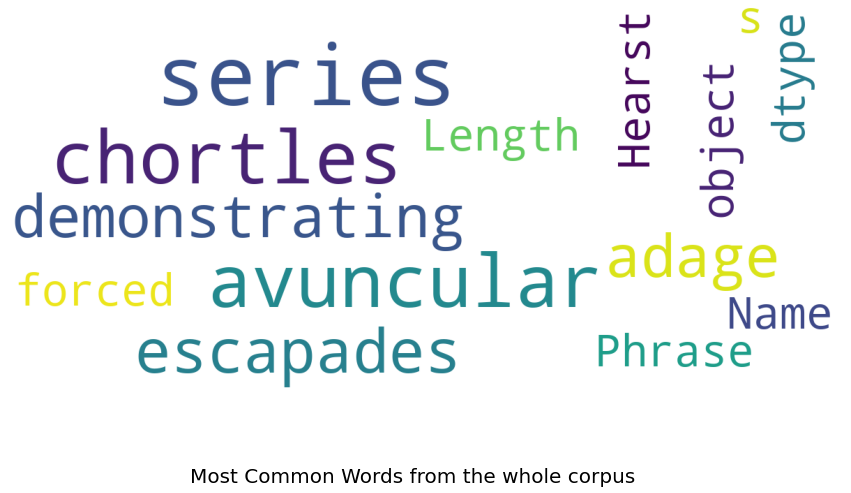

In [16]:
show_wordcloud(train['Phrase'],'Most Common Words from the whole corpus')

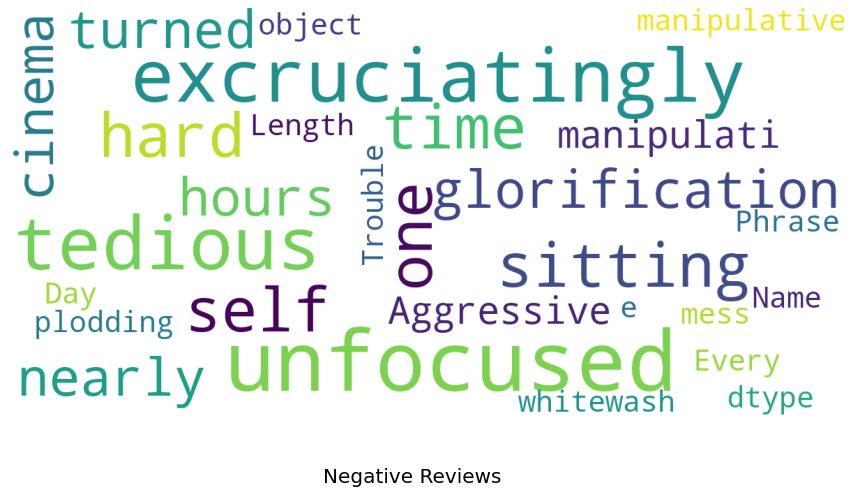

In [17]:
show_wordcloud(train[train['Sentiment'] == 0]['Phrase'],'Negative Reviews')

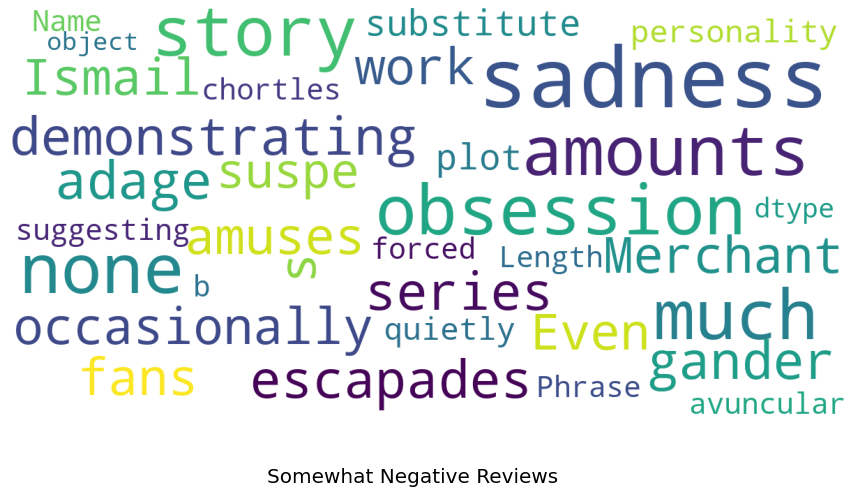

In [18]:
show_wordcloud(train[train['Sentiment'] == 1]['Phrase'],'Somewhat Negative Reviews')

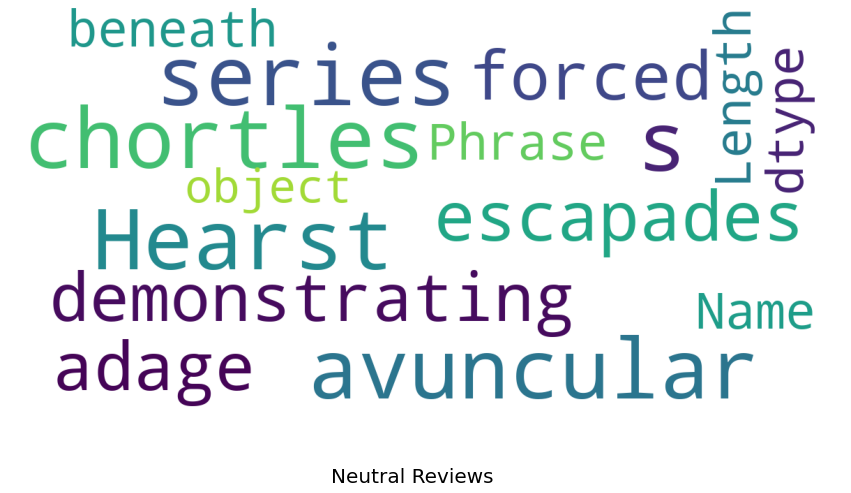

In [19]:
show_wordcloud(train[train['Sentiment'] == 2]['Phrase'],'Neutral Reviews')

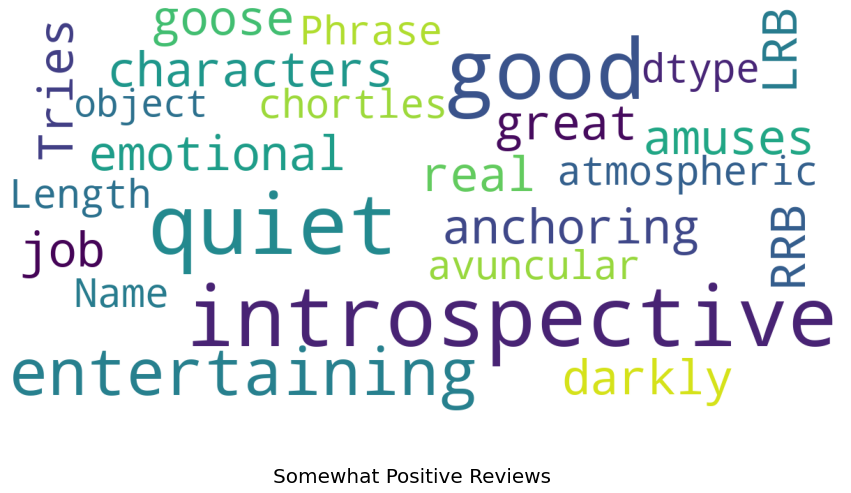

In [20]:
show_wordcloud(train[train['Sentiment'] == 3]['Phrase'],'Somewhat Positive Reviews')

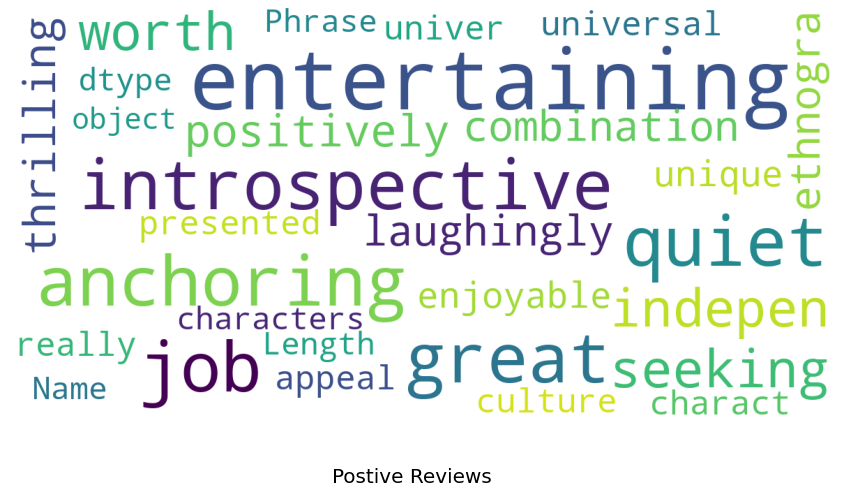

In [21]:
show_wordcloud(train[train['Sentiment'] == 4]['Phrase'],'Postive Reviews')

In [22]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = TweetTokenizer()

In [23]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(train['Phrase'].values) + list(test['Phrase'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train['Phrase'])
test_vectorized = vectorizer.transform(test['Phrase'])

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
y = train['Sentiment']

In [25]:
from sklearn.model_selection import train_test_split
x_train , x_val, y_train , y_val = train_test_split(train_vectorized,y,test_size = 0.2)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [29]:
lr = LogisticRegression(max_iter=200)
ovr = OneVsRestClassifier(lr)
ovr.fit(x_train,y_train)
print(classification_report( ovr.predict(x_val) , y_val))
print(accuracy_score( ovr.predict(x_val) , y_val ))

              precision    recall  f1-score   support

           0       0.18      0.63      0.28       378
           1       0.32      0.56      0.41      3128
           2       0.91      0.64      0.75     22347
           3       0.43      0.60      0.50      4736
           4       0.23      0.68      0.34       623

    accuracy                           0.63     31212
   macro avg       0.41      0.62      0.46     31212
weighted avg       0.75      0.63      0.67     31212

0.6291810841983853


In [30]:
svm = LinearSVC()
svm.fit(x_train,y_train)
print(classification_report( svm.predict(x_val) , y_val))
print(accuracy_score( svm.predict(x_val) , y_val ))

              precision    recall  f1-score   support

           0       0.37      0.48      0.42      1065
           1       0.48      0.55      0.52      4810
           2       0.81      0.72      0.77     17889
           3       0.53      0.59      0.56      6008
           4       0.41      0.53      0.46      1440

    accuracy                           0.65     31212
   macro avg       0.52      0.57      0.54     31212
weighted avg       0.67      0.65      0.66     31212

0.6521530180699731


In [31]:
estimators = [ ('svm',svm) , ('ovr' , ovr) ]
clf = VotingClassifier(estimators , voting='hard')
clf.fit(x_train,y_train)
print(classification_report( clf.predict(x_val) , y_val))
print(accuracy_score( clf.predict(x_val) , y_val ))

              precision    recall  f1-score   support

           0       0.38      0.48      0.42      1081
           1       0.49      0.55      0.52      4965
           2       0.86      0.68      0.76     20051
           3       0.42      0.61      0.50      4527
           4       0.22      0.69      0.33       588

    accuracy                           0.64     31212
   macro avg       0.47      0.60      0.51     31212
weighted avg       0.71      0.64      0.66     31212

0.6417403562732282


Using NLP approach

In [32]:
from keras.utils import to_categorical
target=train.Sentiment.values
y=to_categorical(target)
y

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [33]:
max_features = 13000
max_words = 50
batch_size = 128
epochs = 3
num_classes=5

In [34]:
from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(train['Phrase'],y,test_size = 0.20)

In [36]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding
from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

In [37]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [38]:
X_test = tokenizer.texts_to_sequences(test['Phrase'])
X_test =pad_sequences(X_test, maxlen=max_words)

In [39]:
len(X_test)

66292

In [40]:
X_train =pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)
X_test =pad_sequences(X_test, maxlen=max_words)

GRU

In [41]:
model_GRU=Sequential()
model_GRU.add(Embedding(max_features,100,mask_zero=True))
model_GRU.add(GRU(64,dropout=0.4,return_sequences=True))
model_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
model_GRU.add(Dense(num_classes,activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy'])
model_GRU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1300000   
                                                                 
 gru (GRU)                   (None, None, 64)          31872     
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 1,341,445
Trainable params: 1,341,445
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [42]:
%%time
history1=model_GRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/3
976/976 [==============================] - 317s 313ms/step - loss: 1.0359 - accuracy: 0.5918 - val_loss: 0.8797 - val_accuracy: 0.6472
Epoch 2/3
976/976 [==============================] - 238s 244ms/step - loss: 0.8292 - accuracy: 0.6648 - val_loss: 0.8477 - val_accuracy: 0.6606
Epoch 3/3
976/976 [==============================] - 195s 200ms/step - loss: 0.7730 - accuracy: 0.6858 - val_loss: 0.8327 - val_accuracy: 0.6659
CPU times: user 17min 20s, sys: 1min 5s, total: 18min 26s
Wall time: 12min 31s


In [45]:
res = pd.read_csv('/content/RESULT.csv' , sep = ',')

In [47]:
y_pred1=np.argmax(model_GRU.predict(X_test), axis=-1)
res.Sentiment=y_pred1
res.to_csv('sub1_GRU.csv',index=False)
res.head()

2072/2072 [==============================] - 98s 45ms/step


,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


GRU with sigmoid activation

In [48]:
model2_GRU=Sequential()
model2_GRU.add(Embedding(max_features,100,mask_zero=True))
model2_GRU.add(GRU(64,dropout=0.4,return_sequences=True))
model2_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
model2_GRU.add(Dense(num_classes,activation='sigmoid'))
model2_GRU.compile(loss='binary_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy'])
model2_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         1300000   
                                                                 
 gru_2 (GRU)                 (None, None, 64)          31872     
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 1,341,445
Trainable params: 1,341,445
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [49]:
%%time
history2=model2_GRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/3
976/976 [==============================] - 271s 256ms/step - loss: 0.3665 - accuracy: 0.5774 - val_loss: 0.3153 - val_accuracy: 0.6375
Epoch 2/3
976/976 [==============================] - 188s 192ms/step - loss: 0.2963 - accuracy: 0.6602 - val_loss: 0.3024 - val_accuracy: 0.6569
Epoch 3/3
976/976 [==============================] - 186s 191ms/step - loss: 0.2791 - accuracy: 0.6835 - val_loss: 0.2975 - val_accuracy: 0.6632
CPU times: user 16min 3s, sys: 53.5 s, total: 16min 56s
Wall time: 11min 40s


In [50]:
y_pred2=np.argmax(model2_GRU.predict(X_test), axis=-1)
res.Sentiment=y_pred2
res.to_csv('sub2_GRU.csv',index=False)
res.head()

2072/2072 [==============================] - 41s 18ms/step


,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


LSTM

In [51]:
model3_LSTM=Sequential()
model3_LSTM.add(Embedding(max_features,100,mask_zero=True))
model3_LSTM.add(LSTM(64,dropout=0.4,return_sequences=True))
model3_LSTM.add(LSTM(32,dropout=0.5,return_sequences=False))
model3_LSTM.add(Dense(num_classes,activation='sigmoid'))
model3_LSTM.compile(loss='binary_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy'])
model3_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         1300000   
                                                                 
 lstm (LSTM)                 (None, None, 64)          42240     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 1,354,821
Trainable params: 1,354,821
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [52]:
%%time
history3=model3_LSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/3
976/976 [==============================] - 233s 229ms/step - loss: 0.4049 - accuracy: 0.5315 - val_loss: 0.3614 - val_accuracy: 0.5755
Epoch 2/3
976/976 [==============================] - 209s 214ms/step - loss: 0.3257 - accuracy: 0.6192 - val_loss: 0.3127 - val_accuracy: 0.6424
Epoch 3/3
976/976 [==============================] - 211s 216ms/step - loss: 0.2895 - accuracy: 0.6672 - val_loss: 0.3038 - val_accuracy: 0.6552
CPU times: user 17min 37s, sys: 55.7 s, total: 18min 32s
Wall time: 11min 30s


In [53]:
y_pred3=np.argmax(model3_LSTM.predict(X_test), axis=-1)
res.Sentiment=y_pred3
res.to_csv('sub3_LSTM.csv',index=False)
res.head()

2072/2072 [==============================] - 48s 22ms/step


,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


CNN

In [56]:
model4_CNN= Sequential()
model4_CNN.add(Embedding(max_features,100,input_length=max_words))
model4_CNN.add(Dropout(0.2))
model4_CNN.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model4_CNN.add(GlobalMaxPooling1D())
model4_CNN.add(Dense(128,activation='relu'))
model4_CNN.add(Dropout(0.2))
model4_CNN.add(Dense(num_classes,activation='sigmoid'))
model4_CNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model4_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 100)           1300000   
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 conv1d (Conv1D)             (None, 50, 64)            19264     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [57]:
%%time
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

history4=model4_CNN.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=3, batch_size=batch_size, verbose=1,callbacks = [early_stop])

Epoch 1/3
976/976 [==============================] - 75s 75ms/step - loss: 0.3498 - accuracy: 0.5928 - val_loss: 0.3057 - val_accuracy: 0.6435
Epoch 2/3
976/976 [==============================] - 54s 55ms/step - loss: 0.2848 - accuracy: 0.6714 - val_loss: 0.2906 - val_accuracy: 0.6625
Epoch 3/3
976/976 [==============================] - 54s 55ms/step - loss: 0.2609 - accuracy: 0.7007 - val_loss: 0.2901 - val_accuracy: 0.6622
CPU times: user 4min 23s, sys: 10.6 s, total: 4min 34s
Wall time: 3min 22s


In [60]:
y_pred4=np.argmax(model4_CNN.predict(X_test), axis=-1)
res.Sentiment=y_pred4
res.to_csv('sub4_CNN.csv',index=False)
res.head()

2072/2072 [==============================] - 10s 5ms/step


,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


CNN-GRU

In [61]:
model5_CnnGRU= Sequential()
model5_CnnGRU.add(Embedding(max_features,100,input_length=max_words))
model5_CnnGRU.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
model5_CnnGRU.add(MaxPooling1D(pool_size=2))
model5_CnnGRU.add(Dropout(0.25))
model5_CnnGRU.add(GRU(128,return_sequences=True))
model5_CnnGRU.add(Dropout(0.3))
model5_CnnGRU.add(Flatten())
model5_CnnGRU.add(Dense(128,activation='relu'))
model5_CnnGRU.add(Dropout(0.5))
model5_CnnGRU.add(Dense(5,activation='sigmoid'))
model5_CnnGRU.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model5_CnnGRU.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 100)           1300000   
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 64)            19264     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 64)           0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 25, 64)            0         
                                                                 
 gru_4 (GRU)                 (None, 25, 128)           74496     
                                                                 
 dropout_3 (Dropout)         (None, 25, 128)           0         
                                                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [62]:
%%time
history5=model5_CnnGRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=3, batch_size=batch_size, verbose=1,callbacks=[early_stop])

Epoch 1/3
976/976 [==============================] - 186s 187ms/step - loss: 0.3540 - accuracy: 0.5833 - val_loss: 0.3042 - val_accuracy: 0.6426
Epoch 2/3
976/976 [==============================] - 172s 177ms/step - loss: 0.2908 - accuracy: 0.6654 - val_loss: 0.2911 - val_accuracy: 0.6638
Epoch 3/3
976/976 [==============================] - 151s 154ms/step - loss: 0.2669 - accuracy: 0.6937 - val_loss: 0.2906 - val_accuracy: 0.6644
CPU times: user 11min, sys: 35.3 s, total: 11min 35s
Wall time: 9min 25s


In [63]:
y_pred5=np.argmax(model5_CnnGRU.predict(X_test), axis=-1)
res.Sentiment=y_pred5
res.to_csv('sub5_CnnGRU.csv',index=False)
res.head()

2072/2072 [==============================] - 26s 12ms/step


,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3


GRU-CNN

In [64]:
model6_GruCNN = Sequential()
model6_GruCNN.add(Embedding(max_features,100,input_length=max_words))
model6_GruCNN.add(Dropout(0.2))
model6_GruCNN.add(Bidirectional(GRU(units=128 , return_sequences=True)))
model6_GruCNN.add(Conv1D(32 , kernel_size=3 , padding='same' , activation='relu'))
model6_GruCNN.add(GlobalMaxPooling1D())
model6_GruCNN.add(Dense(units = 64 , activation='relu'))
model6_GruCNN.add(Dropout(0.5))
model6_GruCNN.add(Dense(units=5,activation='sigmoid'))
model6_GruCNN.compile(loss='binary_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model6_GruCNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 100)           1300000   
                                                                 
 dropout_5 (Dropout)         (None, 50, 100)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 50, 256)          176640    
 l)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 32)            24608     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 64)               

In [65]:
%%time
history6 = model6_GruCNN.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=4, batch_size=batch_size, verbose=1,callbacks=[early_stop])

Epoch 1/4
976/976 [==============================] - 391s 396ms/step - loss: 0.3726 - accuracy: 0.5622 - val_loss: 0.3101 - val_accuracy: 0.6373
Epoch 2/4
976/976 [==============================] - 385s 394ms/step - loss: 0.2968 - accuracy: 0.6624 - val_loss: 0.2940 - val_accuracy: 0.6611
Epoch 3/4
976/976 [==============================] - 393s 402ms/step - loss: 0.2731 - accuracy: 0.6895 - val_loss: 0.2889 - val_accuracy: 0.6688
Epoch 4/4
976/976 [==============================] - 395s 405ms/step - loss: 0.2570 - accuracy: 0.7086 - val_loss: 0.2898 - val_accuracy: 0.6692
CPU times: user 43min 56s, sys: 3min 17s, total: 47min 14s
Wall time: 26min 26s


In [66]:
y_pred6=np.argmax(model6_GruCNN.predict(X_test), axis=-1)
res.Sentiment=y_pred6
res.to_csv('sub6_GruCNN.csv',index=False)
res.head()

2072/2072 [==============================] - 61s 29ms/step


,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


Greating a semi-ensemble by taking mode of all the above prediction

In [67]:
res_all=pd.DataFrame({'model1':y_pred1,'model2':y_pred2,'model3':y_pred3,'model4':y_pred4,'model5':y_pred5,'model6':y_pred6})
pred_mode=res_all.agg('mode',axis=1)[0].values
res_all.head()

,model1,model2,model3,model4,model5,model6
0,2,2,2,2,3,2
1,2,2,2,2,3,2
2,2,2,2,2,2,2
3,2,2,2,2,3,2
4,2,2,2,2,3,2


In [68]:
pred_mode=[int(i) for i in pred_mode]
res.Sentiment=pred_mode
res.to_csv('ensemble_mode.csv',index=False)
res.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
